In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc

%matplotlib inline

In [ ]:
# 한글 호환 문제
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rcParams['font.family'] = 'NanumBarunGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/뽀로로드/data(아파트시세_코랩가공)/final.csv', encoding='cp949')
df

,Unnamed: 0,자치구명,층,계약일,임대면적,건물명,건물용도,연식,동별 평균 연식,구별 평균 연식,...,마트,버스정류장,어린이집,CCTV,스타벅스,대학교,병원,지하철,초중고,한강
0,0,용산구,6.0,20200810.0,22.03,\t(1)\t,오피스텔,30.0,13.940659,20.914235,...,0.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,용산구,3.0,20200921.0,66.15,(65-17),연립다세대,12.0,13.940659,20.914235,...,0.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,용산구,5.0,20200225.0,29.72,7-12,연립다세대,1.0,13.940659,20.914235,...,0.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,용산구,4.0,20200210.0,29.94,7-12,연립다세대,1.0,13.940659,20.914235,...,0.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,용산구,5.0,20200111.0,29.69,yonginvill(7-5),연립다세대,2.0,13.940659,20.914235,...,0.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594102,1594329,강북구,15.0,20221229.0,29.22,수유역투웨니퍼스트,오피스텔,0.0,22.724690,19.539600,...,2.0,99.0,22.0,29.0,1.0,0.0,0.0,0.0,5.0,0.0
1594103,1594330,강북구,8.0,20221230.0,127.25,해모로아파트,아파트,19.0,22.724690,19.539600,...,2.0,99.0,22.0,29.0,1.0,0.0,0.0,0.0,5.0,0.0
1594104,1594331,강북구,10.0,20221231.0,41.30,주공1단지,아파트,31.0,22.724690,19.539600,...,2.0,99.0,22.0,29.0,1.0,0.0,0.0,0.0,5.0,0.0
1594105,1594332,강북구,16.0,20221231.0,117.28,오동공원현대,아파트,21.0,22.724690,19.539600,...,2.0,99.0,22.0,29.0,1.0,0.0,0.0,0.0,5.0,0.0


In [ ]:
df1 = df.groupby('건물용도')['전세가'].mean().reset_index()
df1

,건물용도,전세가
0,단독다가구,13460.880887
1,아파트,48798.511319
2,연립다세대,21792.683939
3,오피스텔,19874.314003


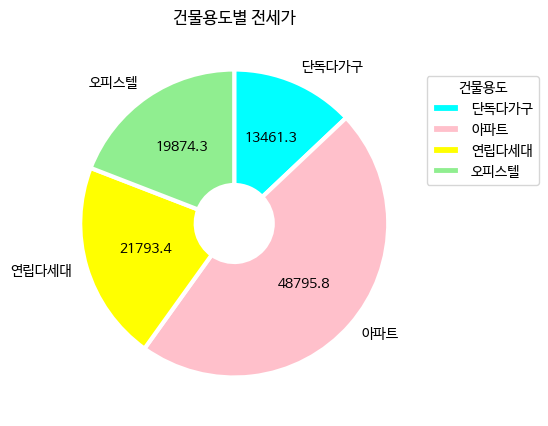

In [ ]:
buildings = ['단독다가구', '아파트', '연립다세대', '오피스텔']
deposit = [13461.346059,48795.794321,21793.368830,19874.285710]
total = sum(deposit)


colors = ['aqua', 'pink', 'yellow', 'lightgreen']
wedgeprops = {'width' : 0.75, 'edgecolor' : 'w', 'linewidth' : 3}

plt.figure(figsize = (10, 5))
plt.title('건물용도별 전세가')
plt.pie(deposit, labels = buildings, autopct=lambda p:'{:.1f}'.format(p*total/100), startangle = 90,\
        counterclock = False, colors = colors, wedgeprops = wedgeprops)
plt.legend(loc = (1, 0.6), title = '건물용도')
plt.show()

In [ ]:
df2 = df.groupby('건물용도').size().reset_index(name='건물용도별 개수')
df2

,건물용도,건물용도별 개수
0,단독다가구,469606
1,아파트,610954
2,연립다세대,344386
3,오피스텔,169432


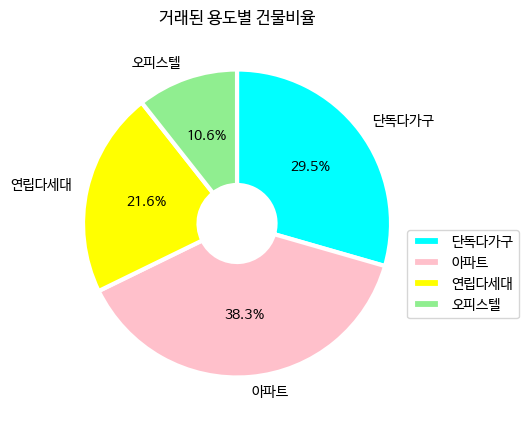

In [ ]:
buildings = ['단독다가구', '아파트', '연립다세대', '오피스텔']
deposit = [469606,610954,344386,169432]
total = sum(deposit)


colors = ['aqua', 'pink', 'yellow', 'lightgreen']
wedgeprops = {'width' : 0.75, 'edgecolor' : 'w', 'linewidth' : 3}

plt.figure(figsize = (10, 5))
plt.title('거래된 용도별 건물비율')
plt.pie(deposit, labels = buildings, autopct='%.1f%%', startangle = 90,\
        counterclock = False, colors = colors, wedgeprops = wedgeprops)
plt.legend(loc = (1, 0.6), title = '건물용도')
plt.legend(bbox_to_anchor=(1.25, 0.5))

plt.show()

In [ ]:
df3 = df.groupby('층')['전세가'].mean().reset_index()
# df3.drop(range(4), axis=0, inplace=True)
df3

,층,전세가
0,-1.0,14307.404419
1,1.0,15611.396993
2,2.0,28072.005696
3,3.0,28426.622755
4,4.0,29519.418349
...,...,...
63,64.0,459834.923113
64,66.0,188373.408769
65,67.0,340000.000000
66,68.0,300000.000000


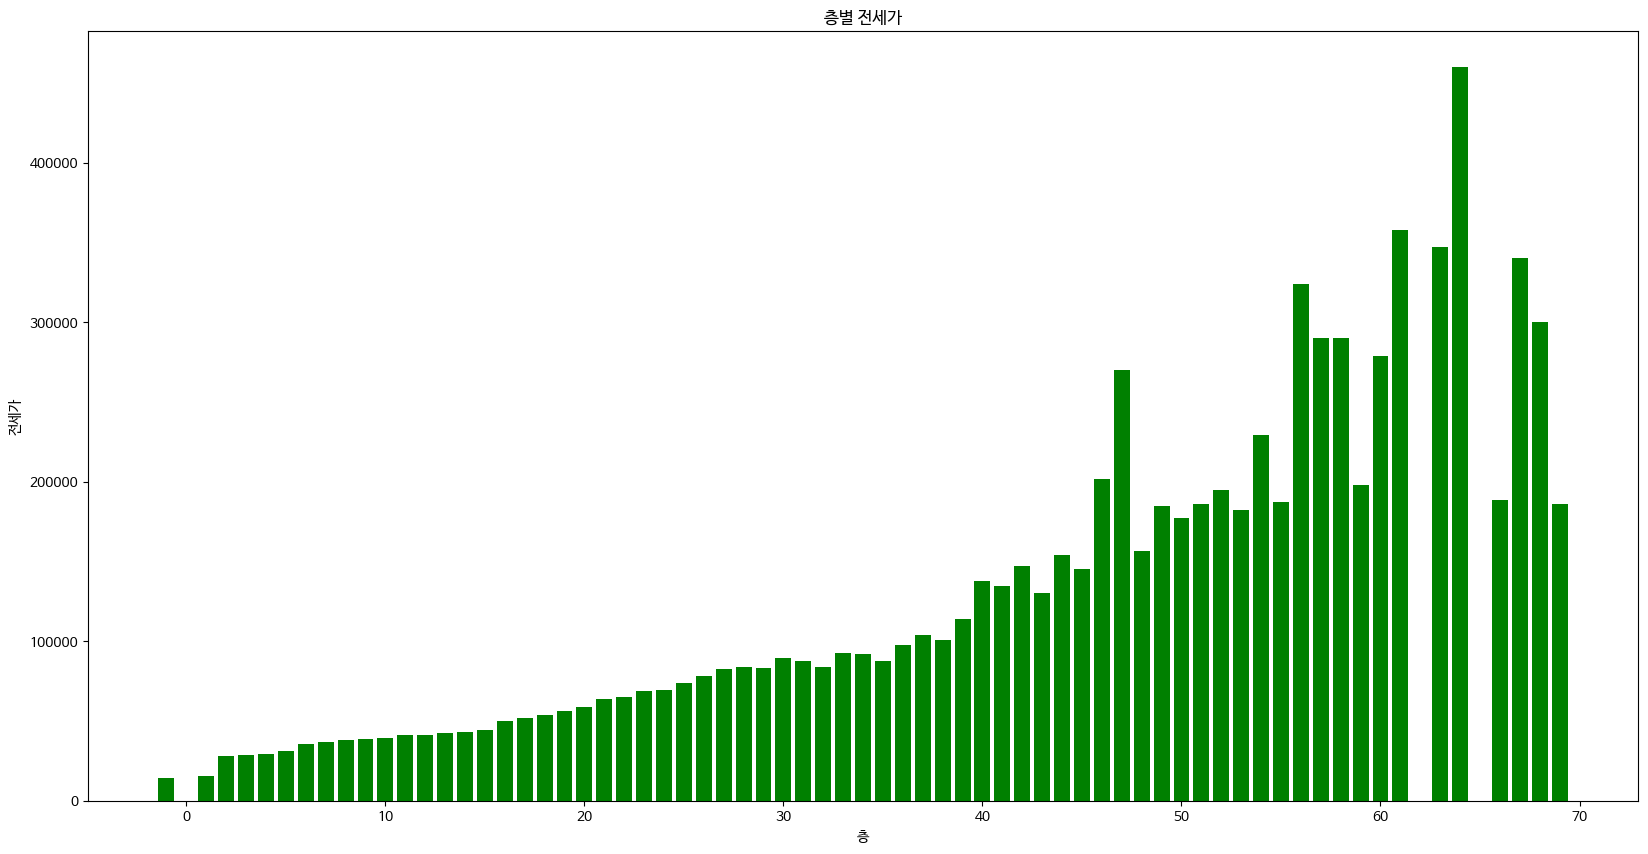

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(df3['층'], df3['전세가'], color='green')
plt.title('층별 전세가')
plt.xlabel('층')
plt.ylabel('전세가')

plt.show()

In [ ]:
df6 = df[[ '층','건물용도','평당전세가']]
df6

,층,건물용도,평당전세가
0,6.0,오피스텔,748.978665
1,3.0,연립다세대,1396.825397
2,5.0,연립다세대,2997.981157
3,4.0,연립다세대,3031.062124
4,5.0,연립다세대,1902.358898
...,...,...,...
1594102,15.0,오피스텔,4449.254012
1594103,8.0,아파트,1426.326130
1594104,10.0,아파트,1358.353511
1594105,16.0,아파트,1266.200546


<ipython-input-11-2ba8a72a8980>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['층_범주'] = df6['층'].apply(categorize_floor)


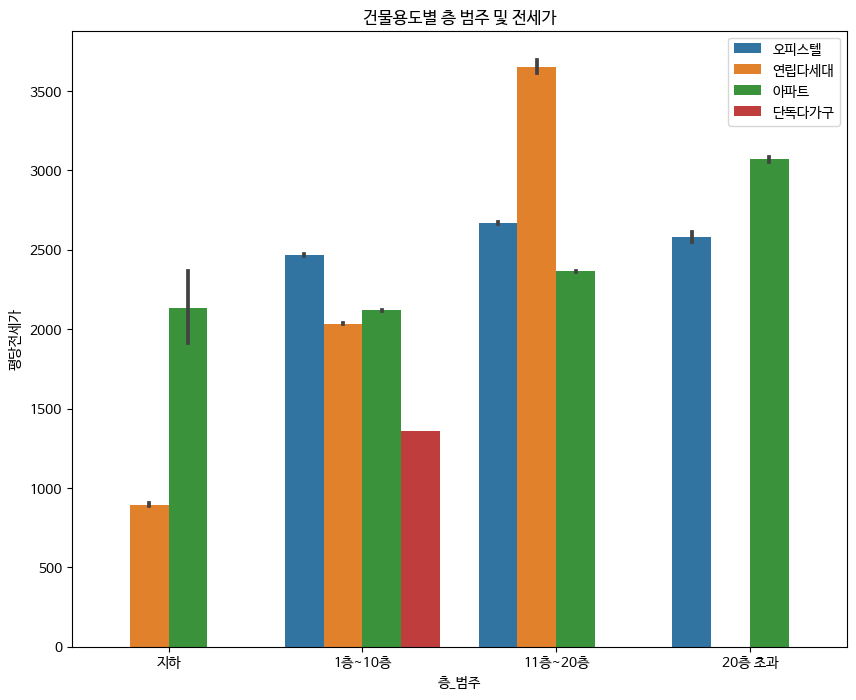

In [ ]:
# 층수를 범주로 나누는 함수 정의
def categorize_floor(floor):
    if floor < 1:
        return '지하'
    elif floor <= 10:
        return '1층~10층'
    elif floor <= 20:
        return '11층~20층'
    else:
        return '20층 초과'

# '층_범주' 열 추가
df6['층_범주'] = df6['층'].apply(categorize_floor)

# Figure 크기 설정
plt.figure(figsize=(10, 8))

# 층 순서 설정
floor_order = ['지하', '1층~10층', '11층~20층', '20층 초과']

# 건물용도별, 층 범주별 전세가에 대한 바 그래프 그리기
sns.barplot(x="층_범주", y="평당전세가", hue="건물용도" , order=floor_order, data=df6)

# 그래프 제목 설정
plt.title("건물용도별 층 범주 및 전세가")

plt.legend(loc='upper right')

# 그래프 표시
plt.show()